# 3 - Data Analysis

In [2]:
import pandas as pd
import numpy as np

from tqdm import tqdm_notebook,tnrange,tqdm_pandas,tqdm
tqdm.pandas(tqdm())

import os
import cPickle as pickle

import datetime as dt

import ipywidgets as widgets


import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
#notify if cell is finished for cells taking longer than 30 seconds
%autonotify -a 30


0it [00:00, ?it/s]


<IPython.core.display.Javascript object>

## Load the Data

In [3]:
pickle_full = "sorted_stays.p"

In [4]:
if os.path.isfile(pickle_full):
    print("loading pickle")
    sorted_stays = pd.read_pickle(pickle_full)
   
else:
    print("Did you run 2 - Algorithm Design?")

loading pickle


In [5]:
left_stays = sorted_stays[sorted_stays["Position"] == "left"]
middle_stays = sorted_stays[sorted_stays["Position"] == "middle"]
right_stays = sorted_stays[sorted_stays["Position"] == "right"]



### Plot the number of stays per urinal 

<IPython.core.display.Javascript object>


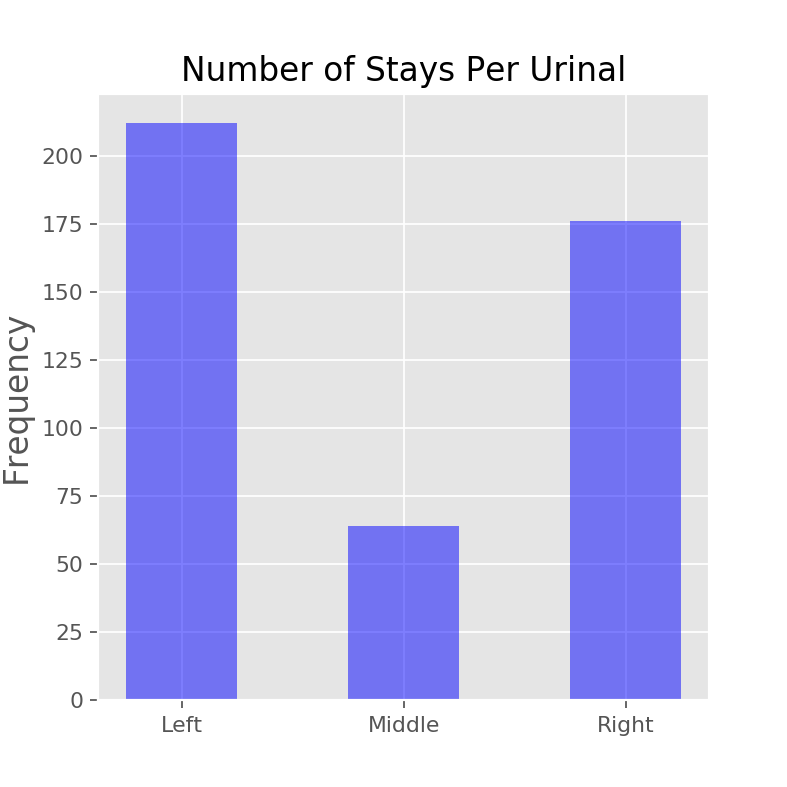

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# %matplotlib inline

plt.rcParams['figure.figsize'] = (5,5)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rcParams['patch.edgecolor'] = 'black'
N = 3
transp = 0.5
num_stays = (len(left_stays),len(middle_stays),len(right_stays))

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, num_stays, width,alpha=transp, color='blue')

ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Number of Stays Per Urinal',fontsize=15)
ax.set_xticks(ind)
ax.set_xticklabels(('Left', 'Middle', 'Right'))

plt.show()

### Plot the mean stay time per urinal (plus standard deviation)

<IPython.core.display.Javascript object>


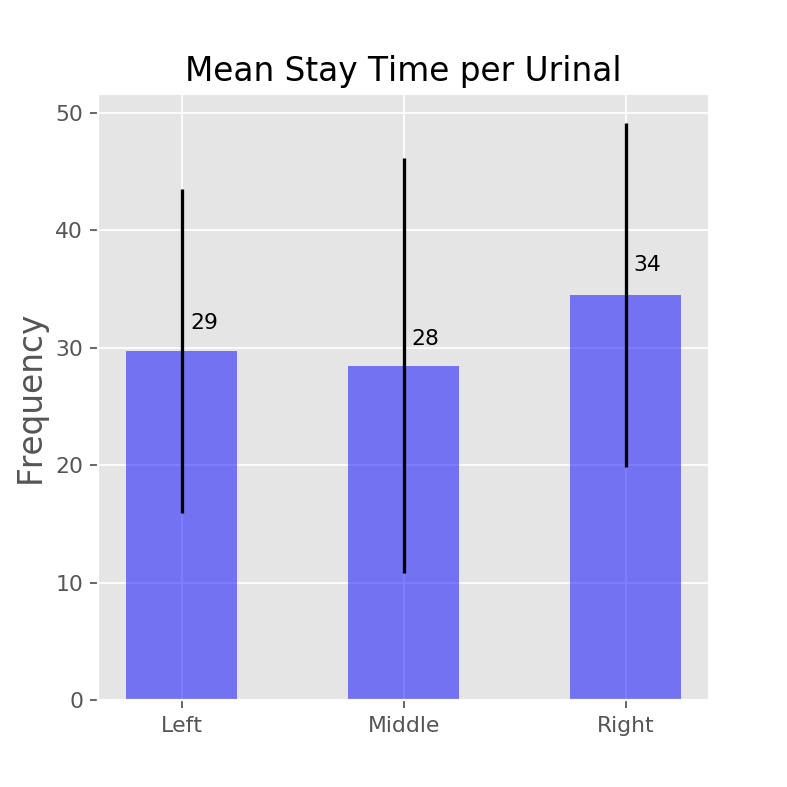

left   - mean: 29.75 	std: 13.79
middle - mean: 28.48 	std: 17.61
right  - mean: 34.47 	std: 14.65
 


In [29]:
left_stay_mean = left_stays['length'].astype('timedelta64[s]').mean()
left_stay_std = left_stays['length'].astype('timedelta64[s]').std()

middle_stay_mean = middle_stays['length'].astype('timedelta64[s]').mean()
middle_stay_std = middle_stays['length'].astype('timedelta64[s]').std()

right_stay_mean = right_stays['length'].astype('timedelta64[s]').mean()
right_stay_std = right_stays['length'].astype('timedelta64[s]').std()


N = 3
transp = 0.5
stay_mean = (left_stay_mean,middle_stay_mean,right_stay_mean)
stay_std = (left_stay_std,middle_stay_std,right_stay_std)
ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, stay_mean, width,alpha=transp, color='blue', yerr=stay_std)

ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Mean Stay Time per Urinal',fontsize=15)
ax.set_xticks(ind)
ax.set_xticklabels(('Left', 'Middle', 'Right'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(0.1+rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)


print("left   - mean: {:0.2f} \tstd: {:0.2f}\nmiddle - mean: {:0.2f} \tstd: {:0.2f}\nright  - mean: {:0.2f} \tstd: {:0.2f}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))


### Plot a Histogram of the Stay Time per Urinal
Someone used the middle urinal for nearly two minutes!

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output

Nbins = 30
plt.rcParams['figure.figsize'] = (10,6)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 15,
        }

colors = {"left":'red',"middle":'blue',"right":'green'}
@interact(Urinal=["left","middle","right"])
def g(Urinal):
    
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 
    x = sorted_stays["length"][sorted_stays["Position"] == Urinal]
    n, bins, patches = ax.hist(x.astype('timedelta64[s]'), bins=Nbins, facecolor=colors[Urinal], alpha=transp, histtype='bar')
    ax.set_xticks(bins);
    
    plt.xlabel('Length of Stay (s)',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title(Urinal,fontsize=15)
    data_mean = x.mean()
    data_std = x.std()
    text = r'$\mu = {} s$'.format(data_mean.seconds) + '\n' + r'$\sigma = {} s$'.format(data_std.seconds)
    plt.text(max(x.astype('timedelta64[s]') - 10), max(n)- 2, text, fontdict=font);
    
    #return Urinal;




## Visits per Hour

In [9]:
sorted_stays["hour"] = sorted_stays["in"].dt.hour
sorted_stays.head(10)

,in,out,in_index,out_index,length,Position,hour
23,2017-11-23 17:05:18,2017-11-23 17:05:52,2509,2814,00:00:34,left,17
28,2017-11-23 17:06:30,2017-11-23 17:07:12,3148,3520,00:00:42,left,17
37,2017-11-23 17:03:22,2017-11-23 17:03:48,1487,1719,00:00:26,right,17
44,2017-11-23 17:04:28,2017-11-23 17:05:15,2073,2486,00:00:47,right,17
69,2017-11-23 17:40:15,2017-11-23 17:40:52,21033,21364,00:00:37,left,17
93,2017-11-23 17:12:43,2017-11-23 17:13:23,6444,6793,00:00:40,right,17
107,2017-11-23 17:03:25,2017-11-23 17:03:49,1511,1725,00:00:24,middle,17
109,2017-11-23 17:35:01,2017-11-23 17:35:46,18262,18660,00:00:45,right,17
118,2017-11-23 17:04:18,2017-11-23 17:05:14,1979,2477,00:00:56,middle,17
138,2017-11-23 17:41:32,2017-11-23 17:41:57,21717,21936,00:00:25,right,17


In [10]:
sorted_ins = sorted_stays.drop(["out","out_index"], axis = 1)
sorted_ins["in_out"] = "in"
sorted_ins = sorted_ins.rename(columns={'in': 'time', 'in_index': 'x'})
sorted_outs = sorted_stays.drop(["in","in_index"], axis = 1)
sorted_outs["in_out"] = "out"
sorted_outs = sorted_outs.rename(columns={'out': 'time', 'out_index': 'x'})
stays = pd.concat([sorted_ins,sorted_outs], axis=0)

stays.sort_values(by=["x"],inplace = True)

hour_df = pd.concat([stays["hour"],stays["in_out"],stays["time"].dt.day], axis = 1)
hour_df = hour_df[hour_df["in_out"] == "in"]
hour_df = hour_df.rename(columns={'time': 'day'})

stays.drop(["x","hour"],axis = 1,inplace = True)
stays.head()

,time,length,Position,in_out
37,2017-11-23 17:03:22,00:00:26,right,in
107,2017-11-23 17:03:25,00:00:24,middle,in
37,2017-11-23 17:03:48,00:00:26,right,out
107,2017-11-23 17:03:49,00:00:24,middle,out
118,2017-11-23 17:04:18,00:00:56,middle,in


In [11]:
hour_df["counts"] = 1
hour_df.drop(["in_out"],axis = 1,inplace = True)
hour_df.sample(5)

,hour,day,counts
14246,15,27,1
3157,12,27,1
1533,15,24,1
3235,13,27,1
2868,10,27,1


In [12]:
hour_counts = hour_df["hour"].value_counts()

hour_counts = hour_counts.sort_index()
# print(hour_counts)
for i in range(24):
    try:
        if hour_counts.index[i] != i:
            hour_counts[i] = 0
            hour_counts.sort_index(inplace=True)
    except IndexError:
        if i == 23:
            hour_counts["23"] = 0

In [13]:
adj_check = (hour_df.hour != hour_df.hour.shift()).cumsum()
hour_sums = hour_df.groupby(['day','hour', adj_check], as_index=False, sort=False)['counts'].sum()
hour_sums.sample(5)


,day,hour,counts
49,28,8,1
34,27,10,26
45,28,2,1
22,25,5,1
44,28,1,5


In [14]:
def find_missing_items(int_list,day):
    # Put the list in a set, find smallest and largest items
    original_set  = set(int_list)
    smallest_item = 0
    largest_item = 23
    if hour_sums["day"].iloc[-1] == day:
        largest_item  = max(original_set)
    elif hour_sums["day"].iloc[0] == day:
        smallest_item = min(original_set)

    # Create a super set of all items from smallest to largest
    full_set = set(xrange(smallest_item, largest_item + 1))

    # Missing items are the ones that are in the full_set, but not in
    # the original_set
    return sorted(list(full_set - original_set))

first_day =  hour_sums["day"].iloc[0]
last_day = hour_sums["day"].iloc[-1]
for day in range(first_day,last_day+1):
    if day == first_day:
        temp = pd.DataFrame({"day":day,"hour":find_missing_items(hour_sums["hour"][hour_sums["day"] == day],day),"counts":0})
        temp = temp.reindex(columns=["day","hour","counts"])
        hour_sums_inserted = pd.concat([hour_sums[hour_sums["day"] == day],temp],axis=0).sort_values(by="hour")        
        continue
        
    temp = pd.DataFrame({"day":day,"hour":find_missing_items(hour_sums["hour"][hour_sums["day"] == day],day),"counts":0})
    temp = temp.reindex(columns=["day","hour","counts"])
    
    currDay = pd.concat([hour_sums[hour_sums["day"] == day],temp],axis=0).sort_values(by="hour")
    
    hour_sums_inserted = pd.concat([hour_sums_inserted, currDay])
    prevDay = currDay


hour_sums = hour_sums_inserted
hour_sums.sample(5)

,day,hour,counts
0,23,22,0
1,24,2,0
23,26,23,0
10,24,10,20
42,27,19,3


## Plot Urinal Visits per Hour

<IPython.core.display.Javascript object>


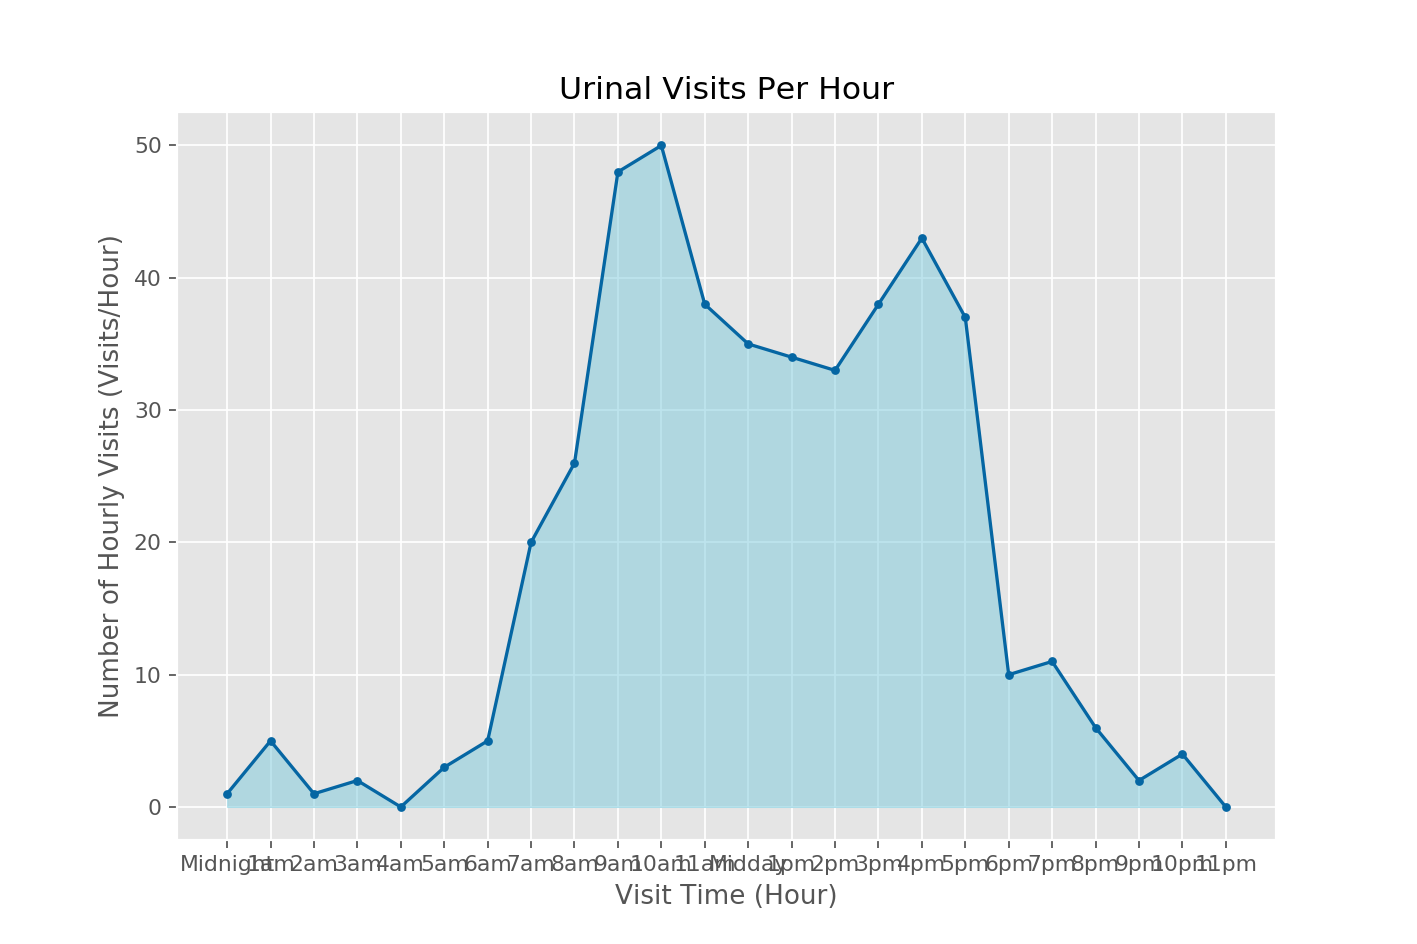

In [31]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (9,6)
visit_times = pd.DataFrame({"Hour Visited":hour_counts})
x = np.arange(0.0, 24, 1)

my_xticks = ["Midnight","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am",
             "Midday"  ,"1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
plt.xticks(range(24), my_xticks);
plt.plot(x, visit_times, marker='.', lw=1.5, color="#0566A3")
# plt.fill_between(visit_times,range(24))
# plt.plot(x, y, marker='.', lw=1)
d = np.zeros(len(visit_times))
plt.fill_between(x,visit_times.iloc[:,0],where=visit_times.iloc[:,0]>=d, interpolate=True, color='#7DCADD',alpha=transp)#"#aee1ec")

plt.xlabel('Visit Time (Hour)');
plt.ylabel('Number of Hourly Visits (Visits/Hour)');
plt.title('Urinal Visits Per Hour');

### last visit before taken down at 8:16, taken down at 8:22

<IPython.core.display.Javascript object>


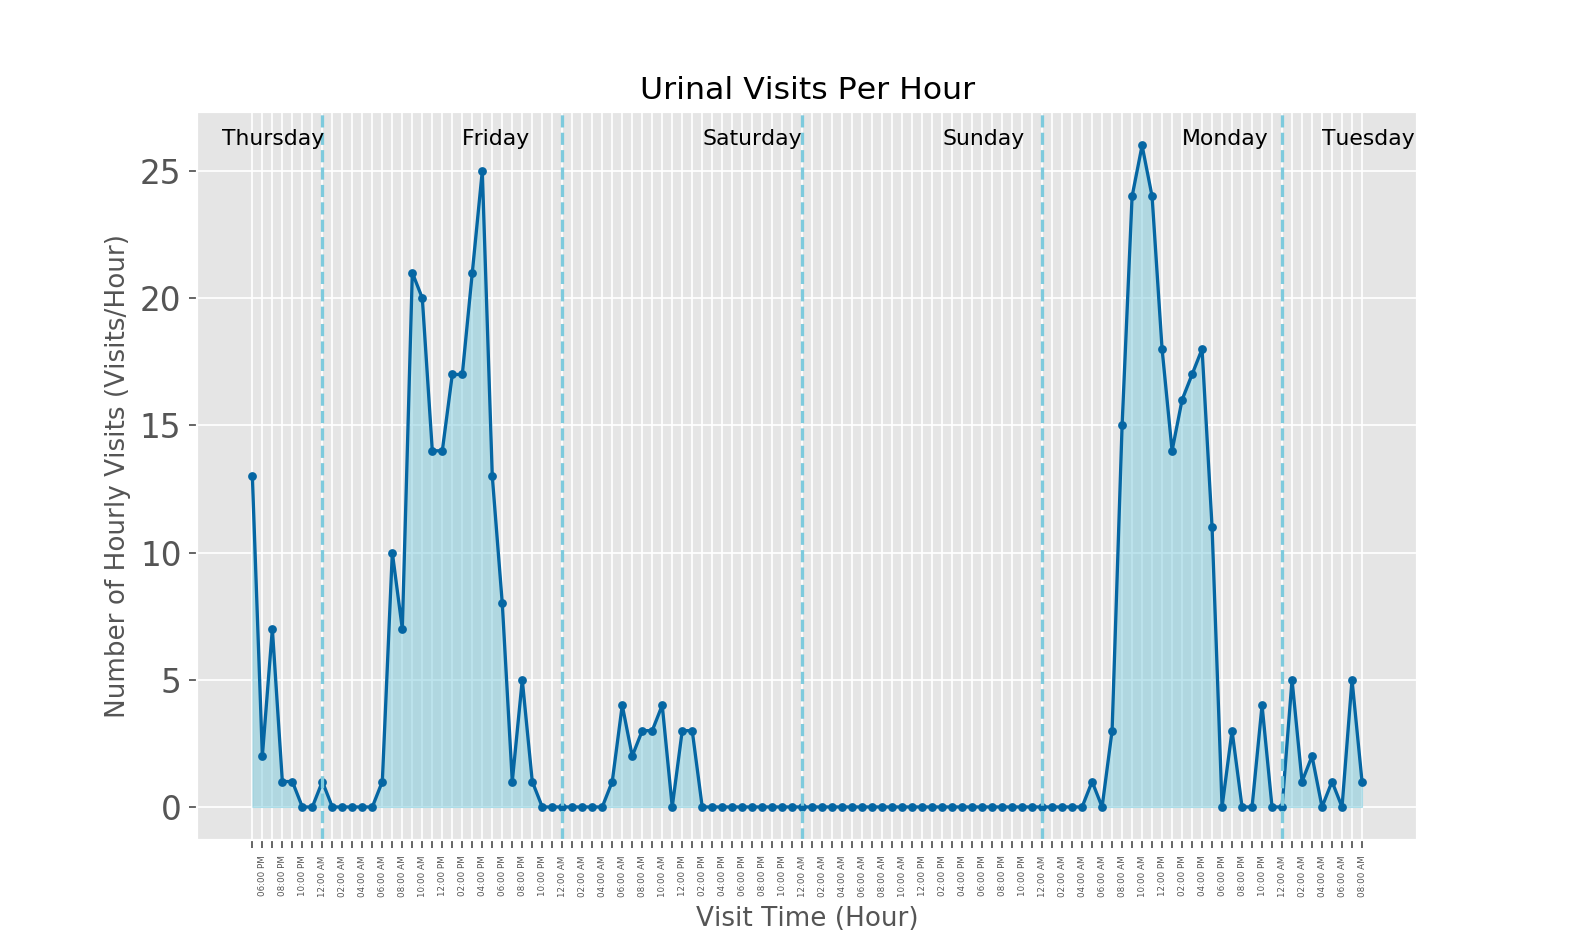

In [32]:

# Set plot parameters
plt.rcParams['figure.figsize'] = (10,6)
plt.rc('xtick', labelsize=4)
plt.rc('ytick', labelsize=15)

# extract data to plot
num_times = pd.DataFrame({"Num Visits":hour_sums["counts"]})
x = np.arange(0.0, len(num_times), 1)

# function to convert hours and days to readable text
from datetime import datetime
def hourint_to_12hour(hour):
    return datetime.strptime(str(int(hour))+":00", "%H:%M").strftime("%I:%M %p")

def dayint_to_12hour(hour):
    return datetime.strptime("11 "+str(hour), "%m %d").strftime("%A")

### ------------------ ###
# major data plotting
fig, ax1 = plt.subplots()

xlabels = hour_sums["hour"].apply(hourint_to_12hour)
ax1.set_xticks(range(0,len(hour_sums["hour"])));
ax1.set_xticklabels(xlabels,rotation=90)#,ha='right')
ax1.plot(x, num_times, marker='.', lw=1.5, color="#0566A3")
### ------------------ ###    


#fill in line plot
d = np.zeros(len(num_times))
ax1.fill_between(x,num_times.iloc[:,0],where=num_times.iloc[:,0]>=d, interpolate=True, color='#7DCADD',alpha=transp)

#Hide every second xlabel
for label in ax1.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

# Label days of the week on plot
start = 7
days = [dayint_to_12hour(x) for x in range(first_day-1,last_day+1)]
for i in range(0,5):
    
    ax1.axvline(start+24*i,ls="--",color="#7DCADD")
    ax1.annotate(str(days[i]),xy=(start+24*i-10,max(hour_sums["counts"]))
                 ,color="black",size=10)
i = 5
ax1.annotate(str(days[i]),xy=(start+24*i-20,max(hour_sums["counts"]))
             ,color="black",size=10)

#Label Axis
ax1.set_xlabel('Visit Time (Hour)');
ax1.set_ylabel('Number of Hourly Visits (Visits/Hour)');
ax1.set_title('Urinal Visits Per Hour');

## Get All state changes

In [17]:
sorted_ins = sorted_stays.drop(["out","out_index"], axis = 1)
sorted_ins["in_out"] = "in"
sorted_ins = sorted_ins.rename(columns={'in': 'time', 'in_index': 'x'})
sorted_outs = sorted_stays.drop(["in","in_index"], axis = 1)
sorted_outs["in_out"] = "out"
sorted_outs = sorted_outs.rename(columns={'out': 'time', 'out_index': 'x'})
stays = pd.concat([sorted_ins,sorted_outs], axis=0)

stays.sort_values(by=["x"],inplace = True)
hour_df = stays["hour"]
stays.drop(["x","hour"],axis = 1,inplace = True)
stays.sample(5)

,time,length,Position,in_out
1242,2017-11-24 13:37:48,00:00:23,left,out
1076,2017-11-24 12:32:22,00:01:13,left,out
12919,2017-11-27 22:28:03,00:00:25,middle,out
159,2017-11-23 18:17:40,00:00:24,left,in
14378,2017-11-27 16:20:27,00:00:42,right,out


## All Possible State Changes
We assume that only one person can walk in and out at a time.  
given a sampling rate of 10 Hz this is a pretty safe bet.  
We also ignore a "change" where the state remains the same
(this is covered by visit times).

We represent the empty urinal by __0__, and a person by __1__.  
So a state change from 1 person at the left Urinal to the empty state:  
        _100 &rarr; 000 = b100000_


In [18]:
# state_changes = {"000100"}

#----- empty to 1 person changes---

states_dec = [
int('100000',2), int('010000',2), int('001000',2),
int('000100',2), int('000010',2), int('000001',2),

#----- 1 person to 2 changes---
int('100110',2), int('100101',2), int('110100',2), 
int('101100',2), int('010110',2), int('010011',2),
int('110010',2), int('011010',2), int('001011',2),
int('001101',2), int('011001',2), int('101001',2),

#----- 2 person to 3 changes---
int('011111',2), int('101111',2), int('110111',2),
int('111011',2), int('111101',2), int('111110',2)]

states_bin = [bin(states_dec[i])[2:].zfill(6) for i in range(len(states_dec))]

## Count All State Changes

In [19]:
state_changes_df = pd.DataFrame({"Count":np.zeros(len(states_bin)),"State Change":states_bin})
state_changes_df = state_changes_df.set_index("State Change")

curr_state = "000"
prev_state = "000"
state_change = None
for row in stays.iterrows():
    
    # Deteremine the current state
    pos =row[1]["Position"]
    inout = row[1]["in_out"]
#     print(pos)
    #LIN
    if pos == "left" and inout=="in":
        curr_state = int(prev_state,2) | int("100",2)
    # LOUT
    if pos == "left" and inout == "out":
        curr_state = int(prev_state,2) & int("011",2)
    # MIN
    if pos == "middle" and inout =="in":
        curr_state = int(prev_state,2) | int("010",2)
    # MOUT
    if pos == "middle" and inout == "out":
        curr_state = int(prev_state,2) & int("101",2)
    # RIN
    if pos == "right" and inout =="in":
        curr_state = int(prev_state,2) | int("001",2)
    # ROUT
    if pos == "right" and inout == "out":
        curr_state = int(prev_state,2) & int("110",2) 
    
    # Get State Change
    state_change = prev_state + bin(curr_state)[2:].zfill(3)
    state_changes_df.loc[state_change] = state_changes_df.loc[state_change]+1
    prev_state = bin(curr_state)[2:].zfill(3)


In [20]:
total = state_changes_df["Count"].sum()
global_prob = state_changes_df/total
state_changes_df.sort_values(by=["Count"]).T

State Change,111011,110111,101111,111101,111110,011111,011010,010110,010011,100110,...,100101,101100,101001,001101,000010,010000,001000,000001,000100,100000
Count,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,...,17.0,18.0,24.0,25.0,58.0,59.0,155.0,157.0,184.0,185.0


## Build a Transistion Matrix

In [39]:
def color_zero_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val <= 0.0 else 'black'
    return 'color: %s' % color

# all states
tri_states = ["000","100","010","001","110","011","101","111"]
# build an empty 8x8 transition matrix
trans_matrix = pd.DataFrame(0.0, index=tri_states, columns=tri_states)


state_changes_df.iloc[0][0]

for i in range(len(state_changes_df)):
#     print(state_changes_df.iloc[i])
    state1 = state_changes_df.iloc[i].name[0:3]
    state2 = state_changes_df.iloc[i].name[3:6]
    trans_matrix[state2][state1] = float(state_changes_df.iloc[i][0])

s = trans_matrix.T.style.applymap(color_zero_red)
s

,000,100,010,001,110,011,101,111
000,0,185,59,155,0,0,0,0
100,184,0,0,0,2,0,18,0
010,58,0,0,0,3,2,0,0
001,157,0,0,0,0,3,24,0
110,0,2,2,0,0,0,0,1
011,0,0,2,4,0,0,0,0
101,0,17,0,25,0,0,0,0
111,0,0,0,0,0,1,0,0


## As Row Probabilities


In [43]:
sum_rows = trans_matrix.sum(axis=0).astype(np.float64)
for index, row_sum in enumerate(sum_rows):
    for col in range(trans_matrix.shape[0]):
#         print("{} / {}".format(trans_matrix[tri_states[index]][tri_states[col]].astype(np.float64),row_sum))
        trans_matrix[tri_states[index]][tri_states[col]] = (trans_matrix[tri_states[index]][tri_states[col]].astype(np.float64) / float(row_sum)).round(5)

trans_matrix = trans_matrix.T

In [44]:
import seaborn as sns
cm = sns.light_palette("#5fba7d", as_cmap=True)
trans_matrix.style.background_gradient(cmap=cm).applymap(color_zero_red)

,000,100,010,001,110,011,101,111
000,0,0.46366,0.14787,0.38847,0,0,0,0
100,0.90196,0,0,0,0.0098,0,0.08824,0
010,0.92063,0,0,0,0.04762,0.03175,0,0
001,0.85327,0,0,0,0,0.0163,0.13043,0
110,0,0.4,0.4,0,0,0,0,0.2
011,0,0,0.33333,0.66667,0,0,0,0
101,0,0.40476,0,0.59524,0,0,0,0
111,0,0,0,0,0,1,0,0


In [48]:
# import pandas as pd
import math
col_types = {"to":str, "000":float, "100":float, "010":float, "001":float, "110":float, "011":float,"101":float, "111":float}
# probs = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jIAa09SCol2bspNN5ZKL3qw4LpUc4i66YNPMOeYWYI_T9v_aMSVKTD0ydRJIcJm70xJC7ISDNuI-/pub?gid=0&single=true&output=csv",
#                     dtype=col_types,
#                     index_col=0)

probs = trans_matrix
# probs
head = """
digraph G {
  graph [overlap=false outputorder=edgesfirst];
  node [style=filled fillcolor=white];
  #edge [color="#57adf9b8", arrowsize=0.5];
  edge [color="#c6dbef:#9ecae1:#6baed6:#4292c6:#2171b5:#08519c:#08306b;0.25", arrowsize=0.5];
  000 [label="⚪⚪⚪"];
  001 [label="⚪⚪👨"];
  010 [label="⚪👨⚪"];
  011 [label="⚪👨👨"];
  100 [label="👨⚪⚪"];
  101 [label="👨⚪👨"];
  110 [label="👨👨⚪"];
  111 [label="👨👨👨"];
"""
tail = "}"
dot_data = ""
for index, row in probs.iterrows():
    count = 0
    for item in row:
        if item != 0:
            edge_data = '  {start} -> {to} [label="{pc:.2%}", penwidth={width}];\n'.format(start=index[:-3],
                                                                                       to=probs.columns[count],
                                                                                       pc=item,
                                                                                       width=math.ceil(item*10))
            dot_data += edge_data
        count+=1
print(head)
print(dot_data)
print(tail)

dot = head+dot_data+tail
G = open('dotgraph.gv','w')
G.write(dot)
G.close()


digraph G {
  graph [overlap=false outputorder=edgesfirst];
  node [style=filled fillcolor=white];
  #edge [color="#57adf9b8", arrowsize=0.5];
  edge [color="#c6dbef:#9ecae1:#6baed6:#4292c6:#2171b5:#08519c:#08306b;0.25", arrowsize=0.5];
  000 [label="⚪⚪⚪"];
  001 [label="⚪⚪👨"];
  010 [label="⚪👨⚪"];
  011 [label="⚪👨👨"];
  100 [label="👨⚪⚪"];
  101 [label="👨⚪👨"];
  110 [label="👨👨⚪"];
  111 [label="👨👨👨"];

   -> 100 [label="46.37%", penwidth=5.0];
   -> 010 [label="14.79%", penwidth=2.0];
   -> 001 [label="38.85%", penwidth=4.0];
   -> 000 [label="90.20%", penwidth=10.0];
   -> 110 [label="0.98%", penwidth=1.0];
   -> 101 [label="8.82%", penwidth=1.0];
   -> 000 [label="92.06%", penwidth=10.0];
   -> 110 [label="4.76%", penwidth=1.0];
   -> 011 [label="3.17%", penwidth=1.0];
   -> 000 [label="85.33%", penwidth=9.0];
   -> 011 [label="1.63%", penwidth=1.0];
   -> 101 [label="13.04%", penwidth=2.0];
   -> 100 [label="40.00%", penwidth=4.0];
   -> 010 [label="40.00%", penwidth=4.0];
   -> 11

In [49]:
from graphviz import render, Digraph
# dot.format = 'svg'
g = Digraph('G', filename='dotgraph.gv')
# render('dot', 'svg', 'dotgraph.gv')  
g

## Conclusions